# SQL and Pandas fun using Google search terms

This is again a little dummy project where I practice connecting to a mysql database from a jupyter notebook. This time I looked up the frequency of google searches per month and year for very particular German words associated with holidays: Monat, Weihnachten, Urlaub, Ostern, Skifahren, Sonnencreme, Bikini, Badeanzug, and Wannsee. They seemingly had some seasonality attached to it. So, I first load the data up in a mysql databank (through pandas) and then do some manipulations on them. Then I reload the data into pandas and try the same manipulations in pandas to see if it is easier in this environment. Lastly, I analyze wether throughout the years, there is truely some seasonality attached to the data with pandas.

## Table of Contents:

[1. Creating the environment and installing required packages](#1.-Creating-the-environment-and-installing-required-packages)

[2. Creating server connection and the database](#2.-Creating-server-connection-and-the-database)

[3. Uploading csv raw data files into pandas to inspect](#3.-Uploading-csv-raw-data-files-into-pandas-to-inspect)

[4. Upload data to MySQL database](#4.-Upload-data-to-MySQL-database)

[5. Calculate the % of German searches from the global total](#5.-Calculate-the-%-of-German-searches-from-the-global-total)

[6. What is the months with most german searches of a given term for each year? - use pandas](#6.-What-is-the-months-with-most-german-searches-of-a-given-term-for-each-year?---use-pandas)

[7. Decomposing seasonal trends with python statsmodels](#7.-Decomposing-seasonal-trends-with-python-statsmodels)


##

## 1. Creating the environment and installing required packages

In [1]:
### Install required packages

# conda 4.14.0, Python 3.9.12
#! conda create --name mysql -y
! conda activate mysql
# install mysql version 0.0.3, mysqlclient-2.2.0
#! pip install mysql
# pandas version 2.0.3, seaborn version '0.11.2'

##

## 2. Creating server connection and the database

In [4]:
### connecting to server

import mysql.connector
from mysql.connector import Error
import pandas as pd

def create_server_connection(host_name, user_name, user_password):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password
        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")

    return connection

pw = 

connection = create_server_connection("localhost", "root", pw)


MySQL Database connection successful


In [5]:
### creating the database

import mysql.connector
from mysql.connector import Error
import pandas as pd

def create_database(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        print("Database created successfully")
    except Error as err:
        print(f"Error: '{err}'")
        
create_database_query= 'CREATE DATABASE GGS'
create_database(connection, create_database_query)

Database created successfully


In [6]:
### creating connection to specific database

import mysql.connector
from mysql.connector import Error
import pandas as pd

def create_db_connection(host_name, user_name, user_password, db_name):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password,
            database=db_name
        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")

    return connection

In [7]:
### creating a query execution function

import mysql.connector
from mysql.connector import Error
import pandas as pd

def execute_query(connection, query):
    cursor = connection.cursor(buffered=True)
    try:
        cursor.execute(query)
        connection.commit()
        print("Query successful")
    except Error as err:
        print(f"Error: '{err}'")

In [8]:
### creating a query execution function

import mysql.connector
from mysql.connector import Error
import pandas as pd

def execute_list_query(connection, sql, val):
    cursor = connection.cursor()
    try:
        cursor.executemany(sql, val)
        connection.commit()
        print("Query successful")
    except Error as err:
        print(f"Error: '{err}'")

##

## 3. Uploading csv raw data files into pandas to inspect

In [9]:
import pandas as pd

num1 = pd.read_csv('raw_st_data/weltweit/multiTimeline.csv', header=1)

In [35]:
num1.head()

,Monat,urlaub: (Weltweit)
0,2004-01,64
1,2004-02,50
2,2004-03,54
3,2004-04,51
4,2004-05,53


In [10]:
num2 = pd.read_csv('raw_st_data/weltweit/multiTimeline(1).csv', header=1)
num3 = pd.read_csv('raw_st_data/weltweit/multiTimeline(2).csv', header=1)
num4 = pd.read_csv('raw_st_data/weltweit/multiTimeline(3).csv', header=1)
num5 = pd.read_csv('raw_st_data/weltweit/multiTimeline(4).csv', header=1)
num6 = pd.read_csv('raw_st_data/weltweit/multiTimeline(5).csv', header=1)
num7 = pd.read_csv('raw_st_data/weltweit/multiTimeline(6).csv', header=1)
num8 = pd.read_csv('raw_st_data/weltweit/multiTimeline(7).csv', header=1)

nom1 = pd.read_csv('raw_st_data/deutschland/multiTimeline.csv', header=1)
nom2 = pd.read_csv('raw_st_data/deutschland/multiTimeline(1).csv', header=1)
nom3 = pd.read_csv('raw_st_data/deutschland/multiTimeline(2).csv', header=1)
nom4 = pd.read_csv('raw_st_data/deutschland/multiTimeline(3).csv', header=1)
nom5 = pd.read_csv('raw_st_data/deutschland/multiTimeline(4).csv', header=1)
nom6 = pd.read_csv('raw_st_data/deutschland/multiTimeline(5).csv', header=1)
nom7 = pd.read_csv('raw_st_data/deutschland/multiTimeline(6).csv', header=1)
nom8 = pd.read_csv('raw_st_data/deutschland/multiTimeline(7).csv', header=1)

In [11]:
### merge dataframes
weltweit = num1.merge(num2, on='Monat').merge(num3, on='Monat').merge(num4, on='Monat').merge(num5, on='Monat').merge(num6, on='Monat').merge(num7, on='Monat').merge(num8, on='Monat')
deutschland = nom1.merge(nom2, on='Monat').merge(nom3, on='Monat').merge(nom4, on='Monat').merge(nom5, on='Monat').merge(nom6, on='Monat').merge(nom7, on='Monat').merge(nom8, on='Monat')

deutschland.head()

,Monat,Weihnachten: (Deutschland),Urlaub: (Deutschland),Ostern: (Deutschland),ski fahren: (Deutschland),sonnencreme: (Deutschland),bikini: (Deutschland),badeanzug: (Deutschland),wannsee: (Deutschland)
0,2004-01,1,42,5,98,1,26,9,21
1,2004-02,1,39,7,52,2,28,7,16
2,2004-03,<1,39,25,15,1,28,10,21
3,2004-04,<1,40,37,0,5,35,13,30
4,2004-05,<1,45,2,0,6,34,13,53


In [12]:
### convert types of data

weltweit = weltweit.replace('<1','0.5')
weltweit.iloc[:,1:] = weltweit.iloc[:,1:].astype('float').astype('int')

deutschland = deutschland.replace('<1','0.5')
deutschland.iloc[:,1:] = deutschland.iloc[:,1:].astype('float').astype('int')

weltweit['Monat'] = pd.to_datetime(weltweit['Monat'])
deutschland['Monat'] = pd.to_datetime(deutschland['Monat'])

In [13]:
### rename columns

#weltweit.columns
weltweit.rename({'urlaub: (Weltweit)': 'Urlaub', 'weihnachten: (Weltweit)': 'Weihnachten','ostern: (Weltweit)': 'Ostern', 'ski fahren: (Weltweit)': 'Skifahren', 'sonnencreme: (Weltweit)': 'Sonnencreme', 'bikini: (Weltweit)': 'Bikini', 'badeanzug: (Weltweit)': 'Badeanzug', 'wannsee: (Weltweit)': 'Wannsee'}, axis=1, inplace=True)
deutschland.rename({'Urlaub: (Deutschland)': 'Urlaub', 'Weihnachten: (Deutschland)': 'Weihnachten','Ostern: (Deutschland)': 'Ostern', 'ski fahren: (Deutschland)': 'Skifahren', 'sonnencreme: (Deutschland)': 'Sonnencreme', 'bikini: (Deutschland)': 'Bikini', 'badeanzug: (Deutschland)': 'Badeanzug', 'wannsee: (Deutschland)': 'Wannsee'}, axis=1, inplace=True)

##

## 4. Upload data to MySQL database

In [27]:
### set pw and db for this section

pw = 
db = 'GGS'

In [15]:
### create the global table

import mysql.connector
from mysql.connector import Error
import pandas as pd

create_global_table = """
CREATE TABLE weltweit (
  Monat DATE PRIMARY KEY,
  Weihnachten SMALLINT NOT NULL,
  Urlaub SMALLINT NOT NULL,
  Ostern SMALLINT NOT NULL,
  Skifahren SMALLINT NOT NULL,
  Sonnencreme SMALLINT NOT NULL,
  Bikini SMALLINT NOT NULL,
  Badeanzug SMALLINT NOT NULL,
  Wannsee SMALLINT NOT NULL
  );
 """

connection = create_db_connection("localhost", "root", pw, db) # Connect to the Database
execute_query(connection, create_global_table) # Execute our defined query

MySQL Database connection successful
Query successful


In [16]:
### create the german table

import mysql.connector
from mysql.connector import Error
import pandas as pd

create_german_table = """
CREATE TABLE deutschland (
  Monat DATE NOT NULL,
  Weihnachten SMALLINT NOT NULL,
  Urlaub SMALLINT NOT NULL,
  Ostern SMALLINT NOT NULL,
  Skifahren SMALLINT NOT NULL,
  Sonnencreme SMALLINT NOT NULL,
  Bikini SMALLINT NOT NULL,
  Badeanzug SMALLINT NOT NULL,
  Wannsee SMALLINT NOT NULL,
  FOREIGN KEY (Monat) REFERENCES weltweit (Monat)
  );
 """

connection = create_db_connection("localhost", "root", pw, db) # Connect to the Database
execute_query(connection, create_german_table) # Execute our defined query

MySQL Database connection successful
Query successful


In [17]:
### upload into global table

connection = create_db_connection("localhost", "root", pw, db)

cursor = connection.cursor()

try: 
    sql = """Insert INTO weltweit (Monat, Weihnachten, Urlaub, Ostern, Skifahren, Sonnencreme, Bikini, Badeanzug, Wannsee) VALUES(%s,%s,%s,%s,%s,%s,%s,%s,%s)"""
    for row in weltweit.values.tolist():
        cursor.execute(sql, tuple(row))
    connection.commit()
    connection.close()
    print("Query successful")
except Error as err:
    print(f"Error: '{err}'")

MySQL Database connection successful
Query successful


In [18]:
### upload into global table

connection = create_db_connection("localhost", "root", pw, db)

cursor = connection.cursor()

try: 
    sql = """Insert INTO deutschland (Monat, Weihnachten, Urlaub, Ostern, Skifahren, Sonnencreme, Bikini, Badeanzug, Wannsee) VALUES(%s,%s,%s,%s,%s,%s,%s,%s,%s)"""
    for row in deutschland.values.tolist():
        cursor.execute(sql, tuple(row))
    connection.commit()
    connection.close()
    print("Query successful")
except Error as err:
    print(f"Error: '{err}'")

MySQL Database connection successful
Query successful


##

## 5. Calculate the % of German searches from the global total in SQL

In [21]:
### create the % table

import mysql.connector
from mysql.connector import Error
import pandas as pd

create_percentage_table = """
CREATE TABLE percentage (
  Monat DATE NOT NULL,
  Weihnachten SMALLINT NOT NULL,
  Urlaub SMALLINT NOT NULL,
  Ostern SMALLINT NOT NULL,
  Skifahren SMALLINT NOT NULL,
  Sonnencreme SMALLINT NOT NULL,
  Bikini SMALLINT NOT NULL,
  Badeanzug SMALLINT NOT NULL,
  Wannsee SMALLINT NOT NULL,
  FOREIGN KEY (Monat) REFERENCES weltweit (Monat)
  );
 """

connection = create_db_connection("localhost", "root", pw, db) # Connect to the Database
execute_query(connection, create_percentage_table) # Execute our defined query

MySQL Database connection successful
Query successful


In [28]:
### calculate percentage

# allow for empty cells if needed -> see here: https://stackoverflow.com/questions/15438840/mysql-error-1364-field-doesnt-have-a-default-values
improve2 = '''
    SET GLOBAL sql_mode='';
    '''

connection = create_db_connection("localhost", "root", pw, db)

cursor = connection.cursor()
try:
    cursor.execute(improve2)
    connection.commit()
    print("Query successful")
except Error as err:
    print(f"Error: '{err}'")


# do the actual insertion

connection = create_db_connection("localhost", "root", pw, db) # Connect to the Database

cursor = connection.cursor()

# queries:

qu_6 = '''INSERT INTO percentage (Monat) SELECT Monat FROM weltweit;'''
qu_7 = '''
INSERT INTO percentage (Monat, Weihnachten, Urlaub, Ostern, Skifahren, Sonnencreme, Bikini, Badeanzug, Wannsee)
SELECT
    d.Monat,
    d.Weihnachten / w.Weihnachten,
    d.Urlaub / w.Urlaub,
    d.Ostern / w.Ostern,
    d.Skifahren / w.Skifahren,
    d.Sonnencreme / w.Sonnencreme,
    d.Bikini / w.Bikini,
    d.Badeanzug / w.Badeanzug,
    d.Wannsee / w.Wannsee
FROM
    deutschland d
INNER JOIN
    weltweit w ON d.Monat = w.Monat;
'''

execute_query(connection, qu_6)
execute_query(connection, qu_7)

MySQL Database connection successful
Query successful
MySQL Database connection successful
Query successful
Query successful


In [29]:
### clean up

connection = create_db_connection("localhost", "root", pw, db) # Connect to the Database

cursor = connection.cursor()

# queries:

qu_8 = '''ALTER TABLE percentage CHANGE Weihnachten percWei SMALLINT;'''
qu_9 = '''ALTER TABLE percentage CHANGE Urlaub percUrl SMALLINT;'''
qu_10 = '''ALTER TABLE percentage CHANGE Ostern percOst SMALLINT;'''
qu_11 = '''ALTER TABLE percentage CHANGE Skifahren percSki SMALLINT;'''
qu_12 = '''ALTER TABLE percentage CHANGE Sonnencreme percSon SMALLINT;'''
qu_13 = '''ALTER TABLE percentage CHANGE Bikini percBik SMALLINT;'''
qu_14 = '''ALTER TABLE percentage CHANGE Badeanzug percBad SMALLINT;'''
qu_15 = '''ALTER TABLE percentage CHANGE Wannsee percWan SMALLINT;'''
qu_16 = '''SELECT deutschland.*, percentage.* FROM deutschland INNER JOIN percentage ON deutschland.Monat = percentage.Monat;'''
qu_17 = '''DROP TABLE percentage;'''

queries = [qu_8, qu_9, qu_10, qu_11, qu_12, qu_13, qu_14, qu_15, qu_16, qu_17]
for query in queries:
    execute_query(connection, query)


MySQL Database connection successful
Query successful
Query successful
Query successful
Query successful
Query successful
Query successful
Query successful
Query successful
Query successful
Query successful


##

## 6. What is the months with most searches of a given German term for each year? - use pandas

In [32]:
import pandas as pd

# Step 1: Extract the year from the date and create a new column 'year'
weltweit['Jahr'] = weltweit['Monat'].dt.year
weltweit.head()

,Monat,Urlaub,Weihnachten,Ostern,Skifahren,Sonnencreme,Bikini,Badeanzug,Wannsee,Jahr
0,2004-01-01,64,3,10,100,4,82,21,68,2004
1,2004-02-01,50,1,16,47,2,75,17,49,2004
2,2004-03-01,54,1,51,10,4,78,20,60,2004
3,2004-04-01,51,1,75,15,8,81,25,82,2004
4,2004-05-01,53,1,3,5,14,87,23,99,2004


In [33]:
# Step 2: Group by 'year' and find the maximum values of the search term columns for each year
max_values = weltweit.groupby('Jahr')[['Weihnachten', 'Urlaub', 'Ostern', 'Skifahren', 'Sonnencreme', 'Bikini', 'Badeanzug', 'Wannsee']].max()

In [34]:
# Step 3: Find the month when the maximum values occurred for each year
max_month_Weihnachten = weltweit.loc[weltweit.groupby('Jahr')['Weihnachten'].idxmax(), 'Monat'].dt.month
max_month_Urlaub = weltweit.loc[weltweit.groupby('Jahr')['Urlaub'].idxmax(), 'Monat'].dt.month
max_month_Ostern = weltweit.loc[weltweit.groupby('Jahr')['Ostern'].idxmax(), 'Monat'].dt.month
max_month_Skifahren = weltweit.loc[weltweit.groupby('Jahr')['Skifahren'].idxmax(), 'Monat'].dt.month
max_month_Sonnencreme = weltweit.loc[weltweit.groupby('Jahr')['Sonnencreme'].idxmax(), 'Monat'].dt.month
max_month_Bikini = weltweit.loc[weltweit.groupby('Jahr')['Bikini'].idxmax(), 'Monat'].dt.month
max_month_Badeanzug = weltweit.loc[weltweit.groupby('Jahr')['Badeanzug'].idxmax(), 'Monat'].dt.month
max_month_Wannsee = weltweit.loc[weltweit.groupby('Jahr')['Wannsee'].idxmax(), 'Monat'].dt.month

In [35]:
# Step 4: Create a new table 'result_df' with 'year', 'max_month_c2', and 'max_month_c3'
result_df = pd.DataFrame({
    'Jahr': max_values.index,  # Year
    'max_month_Weihnachten': max_month_Weihnachten.values,
    'max_month_Urlaub': max_month_Urlaub.values,
    'max_month_Ostern': max_month_Ostern.values,
    'max_month_Skifahren': max_month_Skifahren.values,
    'max_month_Sonnencreme': max_month_Sonnencreme.values,
    'max_month_Bikini': max_month_Bikini.values,
    'max_month_Badeanzug': max_month_Badeanzug.values,
    'max_month_Wannsee': max_month_Wannsee.values
})

# Display the resulting table
print(result_df)


    Jahr  max_month_Weihnachten  max_month_Urlaub  max_month_Ostern  \
0   2004                     12                 7                 4   
1   2005                     12                 7                 3   
2   2006                     12                 7                 4   
3   2007                     12                 7                 4   
4   2008                     12                 7                 3   
5   2009                     12                 7                 4   
6   2010                     12                 7                 3   
7   2011                     12                 7                 4   
8   2012                     12                 7                 4   
9   2013                     12                 7                 3   
10  2014                     12                 7                 4   
11  2015                     12                 7                 3   
12  2016                     12                 7                 3   
13  20

It is almost scary how these search terms peak every year the same month or almost the same month... 'Urlaub' and 'Weihnachten being the most extreme of course...

##

## 7. Decomposing seasonal trends with python statsmodels

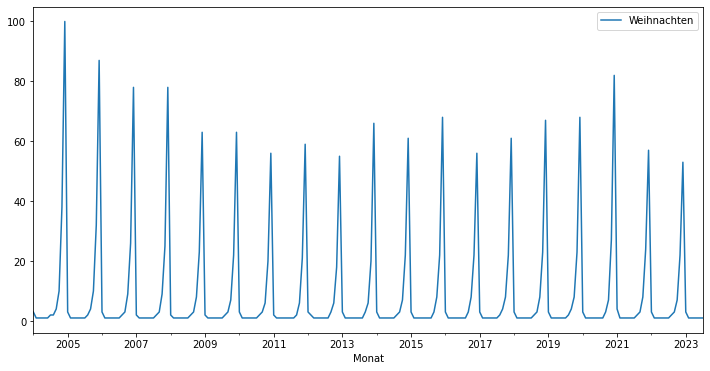

In [36]:
### let's look on the unmodified graphs of the search term results

import pandas as pd

weltweit['Monat'] = pd.to_datetime(weltweit['Monat'])
deutschland['Monat'] = pd.to_datetime(deutschland['Monat'])

w1 = weltweit.plot(x='Monat', y='Weihnachten', figsize=(12,6))

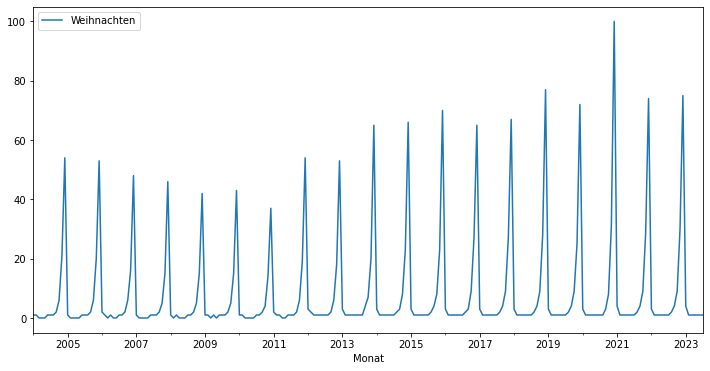

In [23]:
#deutschland.columns
d1 = deutschland.plot(x='Monat', y='Weihnachten', figsize=(12,6))

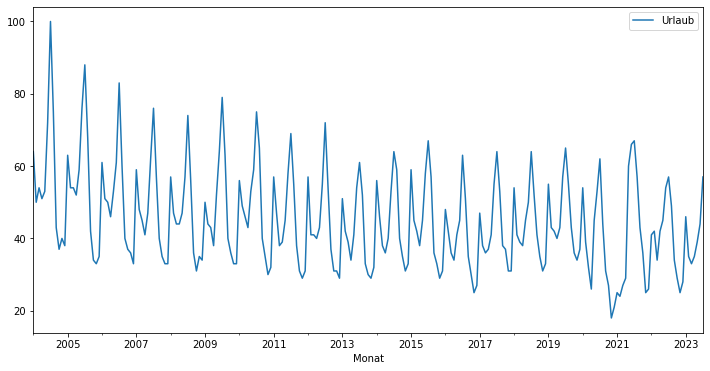

In [9]:
w2 = weltweit.plot(x='Monat', y='Urlaub', figsize=(12,6))

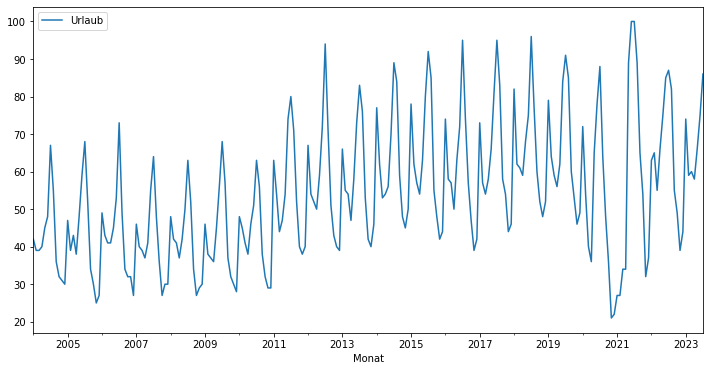

In [24]:
w2 = deutschland.plot(x='Monat', y='Urlaub', figsize=(12,6))

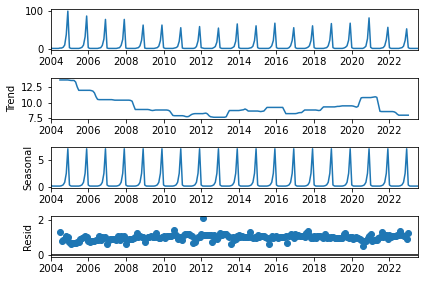

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

weltweit.set_index('Monat', inplace=True)

analysis = weltweit[['Weihnachten']].copy()


decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

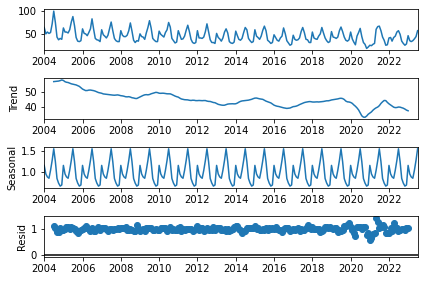

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

#weltweit.set_index('Monat', inplace=True)

analysis2 = weltweit[['Urlaub']].copy()


decompose_result_mult = seasonal_decompose(analysis2, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

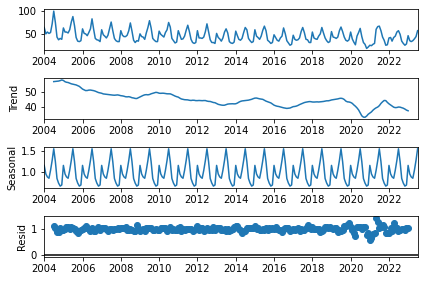

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose

#weltweit.set_index('Monat', inplace=True)

analysis3 = weltweit[['Badeanzug']].copy()


decompose_result_mult = seasonal_decompose(analysis2, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();